##                                         FINAL PROJECT FOR DATA MINING
##                                                               TOPIC

### PREDICTING FAKE NEWS AND TRUE NEWS USING GENERATIVE AND DISCRIMINATIVE MODELS, WITH AND WITHOUT DATA CLEANING

####  The project involves studying two different machine learning models: a Generative model (Naive Bayes) and a Discriminative model (Logistic regression). The goal is to predict whether a news article is fake or true. The project includes two main processes: one with data cleaning and one without data cleaning. In the first process, the ML models are implemented after a series of data cleaning steps. The classification report is generated based on the predictions made by the models. In the second process, the same models are implemented without any data cleaning. This is done to compare the performance of the models with and without data cleaning.
#### To make the project more interesting, a dataset of true news articles is created, which is sourced from various news websites such as CNN, BBC, The New York Post, and others. The dataset consists of news articles published recently in May 2023. The objective is to test the models with this dataset containing the latest news and analyze their performance. However, the dataset chosen for training and testing contains news articles from 2017, and the dates are not specified in the dataset. Another dataset with similar contents is available, but it has news articles specifically from 2017. Initially, the plan was to use the entire dataset, which consisted of 70,000 rows. However, due to the limitations of the machine's processing power, the dataset has been reduced to 20,000 rows, with each label having 10,000 rows. During the data analysis process, it will be determined if the models can accurately predict the labels of the latest news dataset from 2023. If the accuracy falls below 80% for the latest news dataset during the final analysis, it will be concluded that the models have failed to perform satisfactorily. Initial approach was with 40K rows but it was taking some time to load so, final length of rows went to 20K.

### Steps for this projects
1. Import the necessary libraries and datasets.
2. Filter and merge the datasets into one for the cleaning process.
3. Apply data cleaning processes to the merged dataset.
4. Split the cleaned dataset into a training set and a testing set using a 70/30 split ratio.
5. Apply TF-IDF (Term Frequency-Inverse Document Frequency) to convert the cleaned textual data into numerical arrays.
6. Train and test the generative and discriminative models using the training and testing sets and print the classification report.
7. Finally, apply the trained models to the latest news dataset, which is the main task of this project. Analyze the classification report to assess the success or failure of the models in predicting the authenticity of the news.
8. Again, apply the same process without data cleaning process.


### Step 1

In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import seaborn as sn
import pandas as pd

### Step 2


In [2]:
## Importing the data set for True class label
df4=pd.read_csv("DataSet_Misinfo_TRUE.csv")
true1=df4[["text"]]
true1.head(3)

,text
0,The head of a conservative Republican faction ...
1,Transgender people will be allowed for the fir...
2,The special counsel investigation of links bet...


In [3]:
## Adding a true class label to the dataset
true1["label"]=True
true1.head()

,text,label
0,The head of a conservative Republican faction ...,True
1,Transgender people will be allowed for the fir...,True
2,The special counsel investigation of links bet...,True
3,Trump campaign adviser George Papadopoulos tol...,True
4,President Donald Trump called on the U.S. Post...,True


In [4]:
## Selectiing only top 20k rows from true dataset
df8=true1.loc[0:9999]
df8.shape

(10000, 2)

In [5]:
## Checking for the rows and columns
df8.shape

(10000, 2)

In [6]:
## Importing the dataset for False class label
df5=pd.read_csv("DataSet_Misinfo_Fake.csv")
fake1=df5[["text"]]

In [7]:
## checking for the rows and columns
fake1.shape

(43642, 1)

In [8]:
### Selecting only top 20k rows from the dataset
df55=fake1.loc[0:9999]
df55.shape

(10000, 1)

In [9]:
## Adding false class label for the dataset
df55["label"]=False
df55.head(4)

/var/folders/3v/q0wvbvms0x3bd5z88wrm076w0000gn/T/ipykernel_1297/2982191787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df55["label"]=False


,text,label
0,Donald Trump just couldn t wish all Americans ...,False
1,House Intelligence Committee Chairman Devin Nu...,False
2,"On Friday, it was revealed that former Milwauk...",False
3,"On Christmas day, Donald Trump announced that ...",False


In [10]:
## Merging the both datasets "df8" and "df55".
df3=pd.concat([df8,df55], axis=0)

In [11]:
## Priting the final merged dataset
df3

,text,label
0,The head of a conservative Republican faction ...,True
1,Transgender people will be allowed for the fir...,True
2,The special counsel investigation of links bet...,True
3,Trump campaign adviser George Papadopoulos tol...,True
4,President Donald Trump called on the U.S. Post...,True
...,...,...
9995,Here s a 1999 video of Jesse Jackson praising ...,False
9996,Check out what s happening in Texas! President...,False
9997,Jesse Jackson thinks he s Heaven s gatekeeper ...,False
9998,The media will lose it again because Melania T...,False


### Step 3

In [12]:
### importing the necessary libraries for data cleaning process
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /Users/ocn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ocn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ocn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/ocn/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### The dataset has equal numbers of true and false news so, it is the balanced dataset.

In [13]:
df3["label"].value_counts()

True     10000
False    10000
Name: label, dtype: int64

In [14]:
##Checking the data types for the columns
df3.dtypes

text     object
label      bool
dtype: object

In [15]:
##Converting the dataset's text column into string type.
df3['text'] = df3['text'].astype(str)

In [16]:
## Removing the characters that are not aplhabetic characters
df3['text1'] = df3['text'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))

In [17]:
## Removing the punctuations if an missed by above process
def remove_punc(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for i in string:
        if i in punc:
            string = string.replace(i,"")
    return string
df3['text2'] = df3['text1'].apply(remove_punc)    


In [18]:
##Stemming the words to their natural form
def stem_text(string):
    ps = SnowballStemmer(language = 'english')
    words = word_tokenize(string)
    sentence = []
    for word in words:
        sentence.append(ps.stem(word))
    return " ".join(sentence)
df3['text3'] = df3['text2'].apply(stem_text)      


In [19]:
## Removing the stop words
def stop_word(string):
    stop_words = set(stopwords.words('english'))
    word=word_tokenize(string)
    sentence=[]
    for word in word:
        if word not in stop_words:
            sentence.append(word)
    return " ".join(sentence)  
df3['text3'] = df3['text2'].apply(stop_word)   


In [20]:
##Converting the contents to lower case
def lower(string):
    return string.lower()
df3['text4'] = df3['text3'].apply(lower)     


In [21]:
## Removing single characters for  the text columns.
long_char=lambda s: ' '.join(filter(lambda w: len(w) > 1, s.split()))
df3["text5"]=df3['text4'].apply(long_char)


In [22]:
## Selecting only two columns for furthur procesing
df3[["text5", "label"]]

,text5,label
0,the head conservative republican faction congr...,True
1,transgender people allowed first time enlist m...,True
2,the special counsel investigation links russia...,True
3,trump campaign adviser george papadopoulos tol...,True
4,president donald trump called postal service f...,True
...,...,...
9995,here video jesse jackson praising donald trump...,False
9996,check happening texas president trump first la...,False
9997,jesse jackson thinks heaven gatekeeper the arr...,False
9998,the media lose melania trump wore stilettos wa...,False


### Step 4

In [23]:
## Importing tf-idf features and train and test split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [24]:
# Selectiing X and Y
X=df3["text5"]
y=df3["label"]

In [25]:
## Splitting the datset
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

In [26]:
## Printing the length of X_train
len(X_train)

14000

In [27]:
## Printing the length of y_train
len(X_test)

6000

### Step 5

In [28]:
## Apply TF-IDF (Term Frequency-Inverse Document Frequency) to convert the cleaned textual data into numerical arrays.
##tfidf = TfidfVectorizer(ngram_range=(1,1),max_features=None)
tfidf = TfidfVectorizer(ngram_range=(1,1),max_features=None)

In [29]:
X_train_tfidf = tfidf.fit_transform(X_train).toarray()

In [30]:
X_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
len(X_train_tfidf)

14000

In [32]:
# Find non-zero values
non_zero_indices = np.nonzero(X_train_tfidf)
non_zero_values = X_train_tfidf[non_zero_indices]
print("Non-zero values:")
print(non_zero_values)

Non-zero values:
[0.0602143  0.04229695 0.07095975 ... 0.01485308 0.09136411 0.02155008]


In [33]:
len(non_zero_values)

2306917

In [34]:
(X_train_tfidf.shape)

(14000, 63982)

### Step 6

In [35]:
###MultinomialNB classifier

In [36]:
## Importing MultinomialNB classifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [37]:
## fitting the dataset into the model and converting to array
Mnb_model=mnb.fit(X_train_tfidf,y_train)

In [38]:
test_x_Mnb = tfidf.transform(X_test).toarray()
test_x_Mnb.shape

(6000, 63982)

In [39]:
## Importing the accuracy score function
from sklearn.metrics import accuracy_score

In [40]:
## Printring the training accuracy for MNB model
train_accuracy_Mnb = (mnb.score(X_train_tfidf, y_train))
print("Training accuracy:", train_accuracy_Mnb)

Training accuracy: 0.952


In [41]:
## Predictiing the class of testing dataset
y_pred_Mnb = mnb.predict(test_x_Mnb)
y_pred_Mnb

array([False, False, False, ..., False,  True,  True])

In [42]:
## Priting the testing accuracy of the model
accuracy1_NB=(accuracy_score(y_test, y_pred_Mnb))
print(accuracy1_NB)

0.9445


In [43]:
## Printing the classification report for Mnb model
from sklearn.metrics import classification_report
print("The classification report for test dataset for NB\n\n\n",(classification_report(y_test, y_pred_Mnb)))

The classification report for test dataset for NB


               precision    recall  f1-score   support

       False       0.94      0.95      0.94      3000
        True       0.95      0.94      0.94      3000

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



In [44]:
## Printing the confusion matrix and visualizing it.
from sklearn import metrics
Mnb_confusion=metrics.confusion_matrix(y_test, y_pred_Mnb)
Mnb_confusion

array([[2845,  155],
       [ 178, 2822]])

Confusion matrix for MultiNB


<AxesSubplot:>

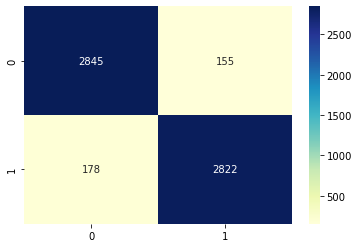

In [45]:
Mnb_confusion=(metrics.confusion_matrix(y_test, y_pred_Mnb))
print("Confusion matrix for MultiNB")
sns.heatmap(Mnb_confusion, annot=True, fmt="d",cmap='YlGnBu')

In [46]:
### Importing the libraries for logistic model.
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='liblinear')

In [47]:
## Fitting the model
log_model = log_model.fit(X_train_tfidf,y_train)

In [48]:
test_x_log = tfidf.transform(X_test).toarray()
test_x_log.shape

(6000, 63982)

In [49]:
## Printing the training accuracy
train_accuracy_log = (log_model.score(X_train_tfidf, y_train))
print("Training accuracy:", train_accuracy_log)

Training accuracy: 0.9924285714285714


In [50]:
## Printing the y_prediction of test dataset.
y_pred_log = log_model.predict(test_x_log)
y_pred_log

array([False, False, False, ..., False,  True,  True])

In [51]:
## Printing the testing accuracy
accuracy3_log=(accuracy_score(y_test, y_pred_log))
accuracy3_log

0.9836666666666667

In [52]:
## Printing the classification report for logistic regression
from sklearn.metrics import classification_report
print("classification report for test dataset for logistic \n\n\n",(classification_report(y_test, y_pred_log)))

classification report for test dataset for logistic 


               precision    recall  f1-score   support

       False       0.99      0.98      0.98      3000
        True       0.98      0.99      0.98      3000

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



confusion matrix for logistic


<AxesSubplot:>

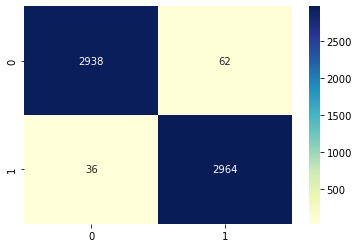

In [53]:
## Printg the confusion matrix for logistic 
from sklearn import metrics
log_confusion=(metrics.confusion_matrix(y_test, y_pred_log))
print("confusion matrix for logistic")
sns.heatmap(log_confusion, annot=True, fmt="d",cmap='YlGnBu')

In [54]:
## Plotting the Mnb and logistic regression accuracy score using barplot.
pl = {"MultiNB": [accuracy1_NB*100], "Logistic": [accuracy3_log*100]}
print(pl)


pl = pd.DataFrame(pl, columns=["MultiNB", "Logistic"])
x=pl.T
x

{'MultiNB': [94.45], 'Logistic': [98.36666666666667]}


,0
MultiNB,94.450000
Logistic,98.366667


In [55]:
# Import matplotlib library at first
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (5, 5)

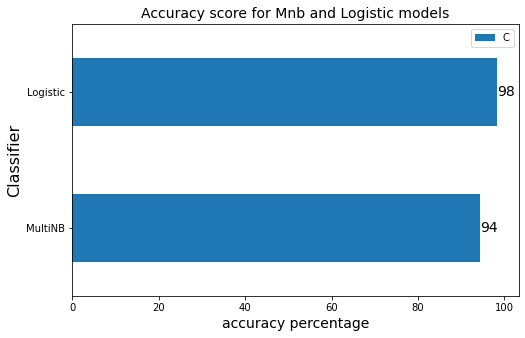

In [56]:
myplot = x.plot(kind='barh', figsize = [8,5])
plt.xlabel('accuracy percentage', fontsize=14)
plt.ylabel('Classifier', fontsize=16)
plt.title('Accuracy score for Mnb and Logistic models', fontsize=14)
plt.legend("Classifier")
for rect in myplot.patches:
    ycoor = rect.get_y() + .5*rect.get_height()
    xcoor = rect.get_width()
    plt.text(xcoor, ycoor, str(int(xcoor)), 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14)

## Step 7
Testing the models with latest news dataset which is the main objective of this project.

In [57]:
### Importing the dataset
cp=pd.read_csv("test_project_news.csv")
cx=cp.dropna()
cx.head(1)

,News_Agency,Url,Date,News Title,News Content
0,CNN Politics,https://www.cnn.com/2023/05/05/politics/biden-...,5/5/2023,Biden tells reporters he will hold a ‘major pr...,\nPresident Joe Biden will not be holding a ne...


In [58]:
## Creating label for ths datset
cd=cx[["News Content"]]
cd["label"]=True
cd

/var/folders/3v/q0wvbvms0x3bd5z88wrm076w0000gn/T/ipykernel_1297/2222265672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd["label"]=True


,News Content,label
0,\nPresident Joe Biden will not be holding a ne...,True
2,You can now remove all unwanted ads instantly ...,True
4,"\nDennis “Maliq” Barnes, the New Orleans high ...",True
6,Some would consider this to be a freezing cold...,True
8,A senior software engineer at Google jumped to...,True
10,The government has allowed animal testing for ...,True
12,Republicans hold supermajorities in both chamb...,True
14,The invitations have been sent and rehearsals ...,True
16,ISTANBUL -- Ukrainian and Russian delegates ha...,True
18,The chaotic week for financial markets is draw...,True


In [59]:
## Cleaning processes
def remove_punc(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for i in string:
        if i in punc:
            string = string.replace(i,"")
    return string
cd['News Content1'] = cd['News Content'].apply(remove_punc) 
def stem_text(string):
    ps = SnowballStemmer(language = 'english')
    words = word_tokenize(string)
    sentence = []
    for word in words:
        sentence.append(ps.stem(word))
    return " ".join(sentence)
cd['News Content2'] = cd['News Content1'].apply(stem_text)  
def stop_word(string):
    stop_words = set(stopwords.words('english'))
    word=word_tokenize(string)
    sentence=[]
    for word in word:
        if word not in stop_words:
            sentence.append(word)
    return " ".join(sentence)  
cd['News Content3']= cd['News Content2'].apply(stop_word)   
def lower(string):
    return string.lower()
cd['News Content4'] = cd['News Content3'].apply(lower)    
long_char=lambda s: ' '.join(filter(lambda w: len(w) > 1, s.split()))
cd['News Content5']=cd['News Content4'].apply(long_char)


/var/folders/3v/q0wvbvms0x3bd5z88wrm076w0000gn/T/ipykernel_1297/1263453922.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['News Content1'] = cd['News Content'].apply(remove_punc)
/var/folders/3v/q0wvbvms0x3bd5z88wrm076w0000gn/T/ipykernel_1297/1263453922.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['News Content2'] = cd['News Content1'].apply(stem_text)


In [60]:
#3 Transforming the dataset for testing
pr = tfidf.transform(cd["News Content5"]).toarray()

In [61]:
## predicting class labels using Mnb model
t=mnb.predict(pr)
t

array([False, False, False, False, False,  True,  True, False,  True,
        True])

In [62]:
## Printing the accuracy for Mnb model
accuracy5_mnb=(accuracy_score(cd["label"],t ))
accuracy5_mnb

0.4

In [63]:
### predicting class labels using log model
m=log_model.predict(pr)
m

array([False, False,  True, False,  True,  True,  True, False, False,
        True])

In [64]:
## Printing the accuracy for log model
accuracy4_log=(accuracy_score(cd["label"],m ))
accuracy4_log

0.5

{'MultiNB': [40.0], 'Logistic': [50.0]}


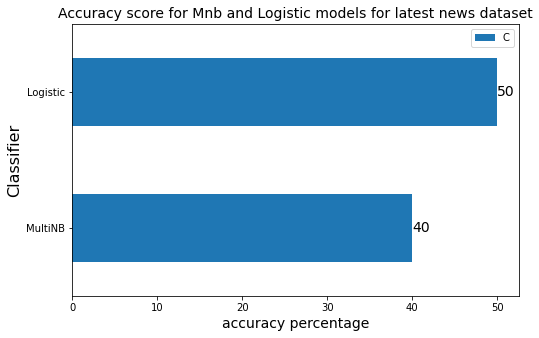

In [65]:
## Plotting the Mnb and logistic regression accuracy score using barplot.
pl11 = {"MultiNB": [accuracy5_mnb*100], "Logistic": [accuracy4_log*100]}
print(pl11)


pl11 = pd.DataFrame(pl11, columns=["MultiNB", "Logistic"])
x1=pl11.T
x1
# Import matplotlib library at first
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (5, 5)
myplot = x1.plot(kind='barh', figsize = [8,5])
plt.xlabel('accuracy percentage', fontsize=14)
plt.ylabel('Classifier', fontsize=16)
plt.title('Accuracy score for Mnb and Logistic models for latest news dataset', fontsize=14)
plt.legend("Classifier")
for rect in myplot.patches:
    ycoor = rect.get_y() + .5*rect.get_height()
    xcoor = rect.get_width()
    plt.text(xcoor, ycoor, str(int(xcoor)), 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14)

## Step 8

### without cleaning

In [66]:
df3
##Converting the dataset's text column into string type.
df3['text'] = df3['text'].astype(str)
## Importing tf-idf features and train and test split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# Selectiing X and Y
X1=df3["text"]
y1=df3["label"]
## Splitting the datset
X1_train,X1_test,y1_train,y1_test=train_test_split(X1, y1, train_size=0.7, random_state=42, stratify=y1)
len(X1_train)
len(X1_test)
## Apply TF-IDF (Term Frequency-Inverse Document Frequency) to convert the cleaned textual data into numerical arrays.
tfidf1 = TfidfVectorizer(ngram_range=(1,1),max_features=None)
X1_train_tfidf = tfidf1.fit_transform(X1_train).toarray()
(X1_train_tfidf.shape)






(14000, 67203)

In [67]:
## Importing MultinomialNB classifier
from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB()
## fitting the dataset into the model and converting to array
Mnb_model1=mnb1.fit(X1_train_tfidf,y1_train)
test_x_Mnb1 = tfidf1.transform(X1_test).toarray()
test_x_Mnb1.shape
## Importing the accuracy score function
from sklearn.metrics import accuracy_score
## Printring the training accuracy for MNB model
train_accuracy_Mnb1 = (mnb1.score(X1_train_tfidf, y1_train))
print("Training accuracy:", train_accuracy_Mnb1)



Training accuracy: 0.9539285714285715


In [68]:
## Predictiing the class of testing dataset
y1_pred_Mnb1 = mnb1.predict(test_x_Mnb1)
y1_pred_Mnb1


array([False, False, False, ..., False,  True,  True])

In [69]:
## Priting the testing accuracy of the model
accuracy1_NB1=(accuracy_score(y1_test, y1_pred_Mnb1))
print(accuracy1_NB1)

0.9436666666666667


In [70]:

## Printing the classification report for Mnb model
from sklearn.metrics import classification_report
print("The classification report for test dataset for NB\n\n\n",(classification_report(y1_test, y1_pred_Mnb1)))
## Printing the confusion matrix and visualizing it.

The classification report for test dataset for NB


               precision    recall  f1-score   support

       False       0.94      0.95      0.94      3000
        True       0.95      0.93      0.94      3000

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



Confusion matrix for MultiNB1


<AxesSubplot:>

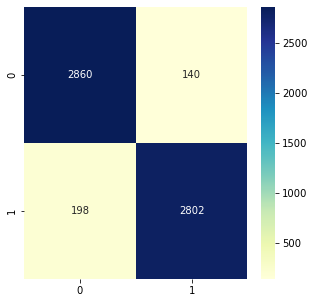

In [71]:
## Printing the confusion matrix and visualizing it.
from sklearn import metrics
Mnb_confusion1=metrics.confusion_matrix(y1_test, y1_pred_Mnb1)
print("Confusion matrix for MultiNB1")
sns.heatmap(Mnb_confusion1, annot=True, fmt="d",cmap='YlGnBu')


In [72]:
### Importing the libraries for logistic model.
from sklearn.linear_model import LogisticRegression
log_model1 = LogisticRegression(solver='liblinear')
## Fitting the model
log_model1 = log_model1.fit(X1_train_tfidf,y1_train)
test_x_log1 = tfidf1.transform(X1_test).toarray()
test_x_log1.shape

(6000, 67203)

In [73]:
## Printing the training accuracy
train_accuracy_log1 = (log_model1.score(X1_train_tfidf, y1_train))
print("Training accuracy:", train_accuracy_log1)
## Printing the y_prediction of test dataset.
y1_pred_log = log_model1.predict(test_x_log1)
y1_pred_log

Training accuracy: 0.9925


array([False, False, False, ..., False,  True,  True])

In [74]:
## Printing the testing accuracy
accuracy3_log1=(accuracy_score(y1_test, y1_pred_log))
accuracy3_log1

0.982

In [75]:

## Printing the classification report for logistic regression
from sklearn.metrics import classification_report
print("classification report for test dataset for logistic \n\n\n",(classification_report(y1_test, y1_pred_log)))

classification report for test dataset for logistic 


               precision    recall  f1-score   support

       False       0.99      0.98      0.98      3000
        True       0.98      0.99      0.98      3000

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



confusion matrix for logistic


<AxesSubplot:>

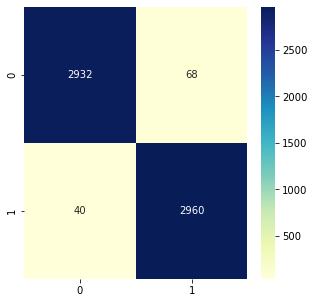

In [76]:
## Printg the confusion matrix for logistic 
from sklearn import metrics
log_confusion1=(metrics.confusion_matrix(y1_test, y1_pred_log))
print("confusion matrix for logistic")
sns.heatmap(log_confusion1, annot=True, fmt="d",cmap='YlGnBu')

{'Logistic': [98.2], 'MultiNB': [94.36666666666666]}


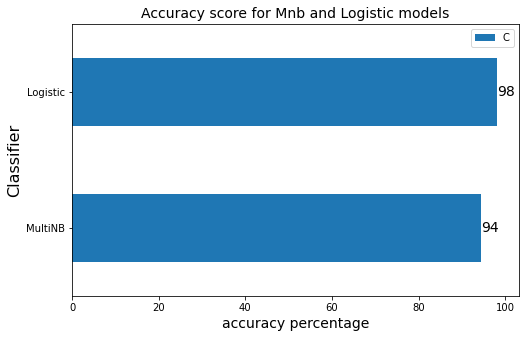

In [77]:
## Plotting the Mnb and logistic regression accuracy score using barplot.
pl1 = {"Logistic": [accuracy3_log1*100], "MultiNB": [accuracy1_NB1*100]}
print(pl1)


pl1 = pd.DataFrame(pl1, columns=["MultiNB", "Logistic"])
x1=pl1.T
x1
# Import matplotlib library at first
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (5, 5)
myplot = x1.plot(kind='barh', figsize = [8,5])
plt.xlabel('accuracy percentage', fontsize=14)
plt.ylabel('Classifier', fontsize=16)
plt.title('Accuracy score for Mnb and Logistic models', fontsize=14)
plt.legend("Classifier")
for rect in myplot.patches:
    ycoor = rect.get_y() + .5*rect.get_height()
    xcoor = rect.get_width()
    plt.text(xcoor, ycoor, str(int(xcoor)), 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14)


In [78]:
cd1=cx[["News Content"]]
cd1["label"]=True
cd1

/var/folders/3v/q0wvbvms0x3bd5z88wrm076w0000gn/T/ipykernel_1297/288140908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd1["label"]=True


,News Content,label
0,\nPresident Joe Biden will not be holding a ne...,True
2,You can now remove all unwanted ads instantly ...,True
4,"\nDennis “Maliq” Barnes, the New Orleans high ...",True
6,Some would consider this to be a freezing cold...,True
8,A senior software engineer at Google jumped to...,True
10,The government has allowed animal testing for ...,True
12,Republicans hold supermajorities in both chamb...,True
14,The invitations have been sent and rehearsals ...,True
16,ISTANBUL -- Ukrainian and Russian delegates ha...,True
18,The chaotic week for financial markets is draw...,True


In [79]:
## Without cleaning

In [80]:
#3 Transforming the dataset for testing
pr1 = tfidf1.transform(cd1["News Content"]).toarray()
t1=mnb1.predict(pr1)
t1

array([False, False, False, False, False,  True,  True, False,  True,
        True])

In [81]:
pr1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
# Find non-zero values
non_zero_indices3 = np.nonzero(pr1)
non_zero_values3 = pr1[non_zero_indices3]
print("Non-zero values:")
print(non_zero_values3)
len(non_zero_values3)

Non-zero values:
[0.07525832 0.3425297  0.08951675 ... 0.06153282 0.04551432 0.0574555 ]


1896

In [83]:
zero_indices1 = np.where(pr1 == 0)
zero_values1 = pr1[zero_indices1]
print("Zero values:")
print(zero_values1)

Zero values:
[0. 0. 0. ... 0. 0. 0.]


In [84]:
len(zero_values1)

670134

In [85]:
## Printing the accuracy for Mnb model
accuracy5_mnb1=(accuracy_score(cd1["label"],t1 ))
accuracy5_mnb1

0.4

In [86]:
### predicting class labels using log model
m1=log_model1.predict(pr1)
m1


array([False, False,  True, False,  True,  True,  True, False,  True,
        True])

In [87]:
## Printing the accuracy for log model
accuracy4_log1=(accuracy_score(cd1["label"],m1 ))
accuracy4_log1

0.6

Confusion matrix for MultiNB1


<AxesSubplot:>

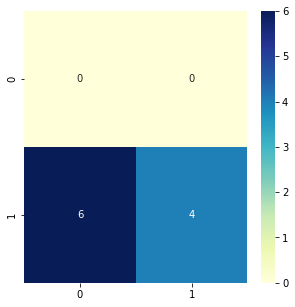

In [88]:
## Printing the confusion matrix and visualizing it.
from sklearn import metrics
tr1=metrics.confusion_matrix(cd1["label"], t1)
print("Confusion matrix for MultiNB1")
sns.heatmap(tr1, annot=True, fmt="d",cmap='YlGnBu')

Confusion matrix for log1


<AxesSubplot:>

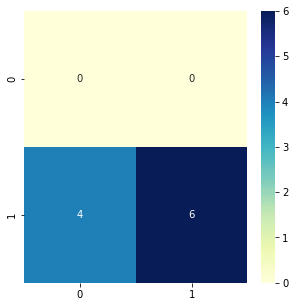

In [89]:
## Printing the confusion matrix and visualizing it.
from sklearn import metrics
mr1=metrics.confusion_matrix(cd1["label"], m1)
print("Confusion matrix for log1")
sns.heatmap(mr1, annot=True, fmt="d",cmap='YlGnBu')

In [90]:
log1_confusion=metrics.confusion_matrix(cd["label"],m1)
log1_confusion

array([[0, 0],
       [4, 6]])

{'MultiNB': [40.0], 'Logistic': [60.0]}


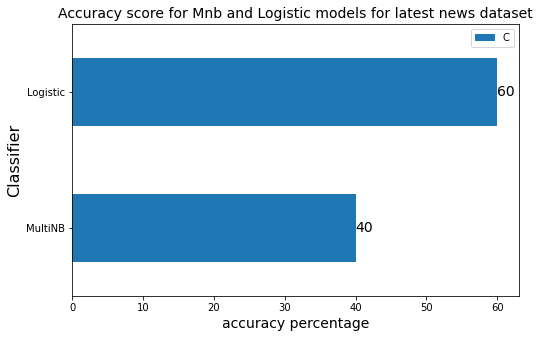

In [91]:
## Plotting the Mnb and logistic regression accuracy score using barplot.
pl1 = {"MultiNB": [accuracy5_mnb1*100], "Logistic": [accuracy4_log1*100]}
print(pl1)


pl1 = pd.DataFrame(pl1, columns=["MultiNB", "Logistic"])
x1=pl1.T
x1
# Import matplotlib library at first
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (5, 5)
myplot = x1.plot(kind='barh', figsize = [8,5])
plt.xlabel('accuracy percentage', fontsize=14)
plt.ylabel('Classifier', fontsize=16)
plt.title('Accuracy score for Mnb and Logistic models for latest news dataset', fontsize=14)
plt.legend("Classifier")
for rect in myplot.patches:
    ycoor = rect.get_y() + .5*rect.get_height()
    xcoor = rect.get_width()
    plt.text(xcoor, ycoor, str(int(xcoor)), 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14)

#### The model's performance on the latest news dataset was unexpectedly poor, and I believe there could be several reasons for this outcome. It's possible that I may have overlooked important steps or made mistakes during the project. While the model showed excellent performance during training and testing with the same dataset, it struggled significantly when faced with the latest news data. Despite analyzing the cleaned and uncleaned data, I didn't observe any significant differences as both versions produced similar results within a range of 5%, and both exceeded 90% accuracy. However, when applied to the latest news dataset, the model only achieved accuracies of 40% ,50%  for cleaned and 40%, 60% for uncleaned respectively(NB and Logistic), which was highly disappointing. Ultimately, the model's performance fell short. 


#### I attempted to process the data using bi-grams and other techniques, but the sheer size of the dataset proved to be a challenge for the machine, preventing me from conducting further analysis. I also attempted to improve the model's performance by limiting the number of features in the dataset. However, this approach did not yield better results and instead resulted in lower accuracy.
#### Also, approach had been made by changing train and test dataset size, however results were not consistance more lesser the dataset for training more better was the logistic regression for latest news but NB was getting poor as reducing the dataset size.
#### This project concludes that models need to be updated time to time for the better performance, as seen the news dataset from 2017 doesnot work for latest news of 2023. Things keep changing time to time so, news field also has changed during the course of time. For future, looking for the latest datsets of news to repeated the process and to see the final result.


#### Always welcome comments and suggestions to improve the model or to change the process. This summer i will try to look for the latest news if found will share the furthur details.

### Thankyou

In [92]:
     ##################################################THE END#######################################################